# Standard Gaussian Distribution

 Gaussian distribution is a type of continuous probability distribution for a real-valued random variable. <br>
 A standard Gaussian Distribution is the one in which mean $\mu = 0$ and standard deviation $\sigma = 1$

$$ \phi(x) = \frac{1}{\sigma \sqrt{2\pi}} e^{\frac{1}{2} (\frac{x-\mu}{\sigma})^2} $$

Let us understand this distribution in the context of machine learning with python code. <br>
When we think of gaussian distributions in 1,2 or 3 dimensions we think of a blob of mass near the origin and exponential decay away from the origin. But the picture is quite different in higher dimensions. Gaussian distributions behave like soap bubbles where most of the mass is concentrated near the shell of a given radius and empty everywhere else. 

In [16]:
%matplotlib inline

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as spla
from scipy.spatial.distance import cdist
from numpy.linalg import norm
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import math

## Generating a random Gaussian distribution

A generic function to generate 10000 samples from the standard multivariate Gaussian distribution. Will use this function further to generate distributions for d=3 and plot the histogram of its Euclidean norms.

We want a standard distribution, hence we want mean $$ \mu = 0 $$  $$ covariance = 1 $$
Hence we take an array of zeros as mean and an identity matrix of size d as covariance

The below function will generate a (10000 x d) matrix of random samples

In [18]:
#function to generate 10000 random samples in d dimensions
def generate_random_sample(d):
    mean = np.zeros(d)
    cov = np.identity(d)
    samples = np.random.multivariate_normal(mean,cov,10000)
    
    #calculating norms, mean, standard deviation
    norms = euclidean_norm(samples)
    sample_mean = np.mean(norms)
    std = np.std(norms)
    
    return(sample_mean,std,norms)

In [19]:
#function to calculate euclidean norms of a set of samples
def euclidean_norm(samples):
    norms  = []
    for row in samples:
        sum_sq =0
        for dim in range(d):
            sum_sq += row[dim]**2
        norms.append(math.sqrt(sum_sq))
    return(norms)

In [20]:
ds = [1,2,3,10,20,50,100,200,350,500,750,1000]
all_means = []
all_std = []
for d in ds:
    mean,std,norms = generate_random_sample(d)
    all_means.append(mean)
    all_std.append(std)

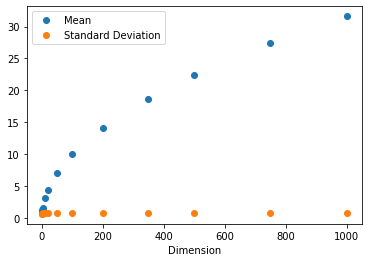

In [21]:
plt.plot(ds,all_means,'o',label='Mean')
plt.plot(ds,all_std,'o',label='Standard Deviation')
plt.xlabel('Dimension')
plt.legend()

Observing variation of mean and standard deviation as dimention increases 

We can see from the above plot that as we increase dimension drastically, the mean is increasing in almost natural log way  but at the same time, the standard deviation does not change much at all.

Thus we can draw a conclusion that the spread of a gaussian distribution is independent of the dimension of the determining parameters. That is, if we are able to generate a distribution at a say a high confidence level, then that level does not change with change in dimension.  

 ## Plotting for three dimentional space
 $$d = 3 $$ 

In [76]:
#function to plot the histogram of samples and mean line.
def plot_hist_norms(norms,bin_size):
    plt.hist(norms, bins = bin_size)
    plt.axvline(sum(norms)/len(norms),color='r',linewidth=2)
    plt.xlabel('Euclidean norms')
    plt.ylabel('Samples')
    plt.np.std(norms)

1.6032744408828705 0.6801005316551701
1.6032744408828705 0.6801005316551701


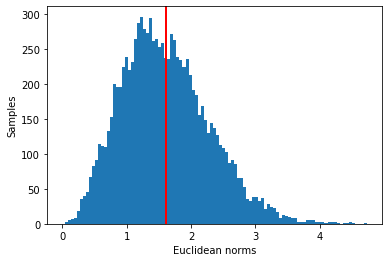

In [79]:
m,sd,mynorms = generate_random_sample(3)
print(m,sd)
plot_hist_norms(mynorms,100)
plt.plot(m)